# Optimization Visualization

We want to visualize the progress of different optimization algorithms, to better understand the difficulties an pitfalls. We will show how to create an animation.

## Formulation

We consider the Himmelblau function, defined as

$$ f(x,y) = (x^2 + y - 11)^2 + (x + y^2 -7)^2 . $$

It has four identical local minima 

$$\begin{aligned}
f(x_*) = 0 & \quad \text{at} \quad  x_* = (3, 2), \\
f(x_*) = 0 & \quad \text{at} \quad  x_* = (-2.8051, 3.2832), \\
f(x_*) = 0 & \quad \text{at} \quad  x_* = (−3.7793, −3.2832), \\
f(x_*) = 0 & \quad \text{at} \quad  x_* = (3.5845, −1.8481), 
\end{aligned}$$

and one local maximum,

$$
f(x_*) = 181.167 \quad \text{at} \quad  x_* = (-0.2708, −0.9230) .
$$

The Himmelblau Function is defined in the two dimensional space, and is used to test the performance properties of optimization algorithms such as:
- Convergence rate
- Precision
- Robustness 

The Himmelblau function has the following characteristics:
- Multi-modal 
- Non-separable
- Non-convex
- Continuous 


In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML
import math
#from itertools import zip_longest
#from sklearn.datasets import make_classification

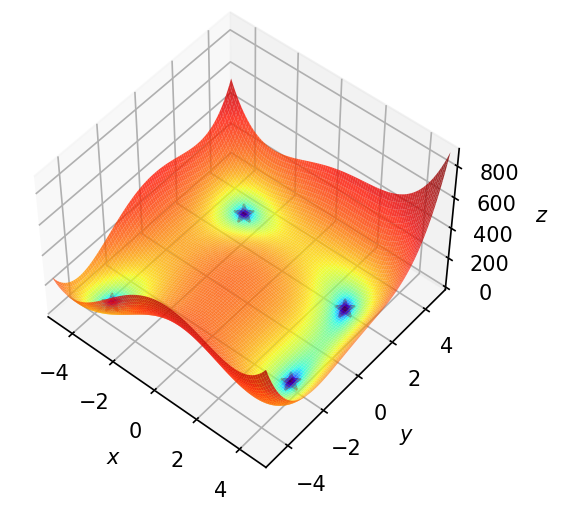

In [33]:
f  = lambda x, y: (x**2 +y -11)**2 + (x + y**2 -7)**2
xmin, xmax, xstep = -5, 5, .1
ymin, ymax, ystep = -5, 5, .1
# 3D plot
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
# 4 minima to display on the plot
min1 = np.array([[3.], [2.]])
min2 = np.array([-2.80, 3.13])
min3 = np.array([-3.78, -3.3])
min4 = np.array([3.6, -1.85])

# plot
fig = plt.figure(dpi=150, figsize=(6, 4))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*min1, f(*min1), 'r*', markersize=10)
ax.plot(*min2, f(*min2), 'r*', markersize=10)
ax.plot(*min3, f(*min3), 'r*', markersize=10)
ax.plot(*min4, f(*min4), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

### Gradients

We need the gradients to manually code the descent algorithm that stores the descent path for subsequent plotting.

In [11]:
dx = lambda x, y: 2*(x**2 +y -11)*2*x + 2*(x + y**2 -7)
dy = lambda x, y: 2*(x**2 +y -11) + 2*(x + y**2 -7)*2*y

def gradient_descent(init_point,learning_rate, num_epochs):
    x0 = init_point[0]
    y0 = init_point[1]
    
    path = np.zeros((2,num_epochs+1))
    
    path[0][0] = x0
    path[1][0] = y0
    
    for i in range(num_epochs):
        x_ =  learning_rate*dx(x0,y0)
        y_ =  learning_rate*dy(x0,y0)
        x0 -= x_
        y0 -= y_
        path[0][i+1] = x0
        path[1][i+1] = y0
        
    return (path,(x0,y0))

We define a few starting points that will each be used to initilize the GD, then display their paths.

In [12]:
begin_points = [
    np.array([0.,0.]),
    np.array([-0.5,0.]),
    np.array([-0.5,-0.5]),
    np.array([0.5,-0.5]),
    np.array([0.5,-0.5]),
    np.array([-1.23633,-1.11064]),
    np.array([0.295466,-1.2946]),
    np.array([0.3616,4.9298]),
    np.array([1.362,-4.774]),
               ]

paths = []
for begin_point in begin_points:
    path,_ = gradient_descent(begin_point,learning_rate=0.001, num_epochs=300)
    path = path[:, [i for i in range(0,path.shape[1],5)]]
    paths.append(path)

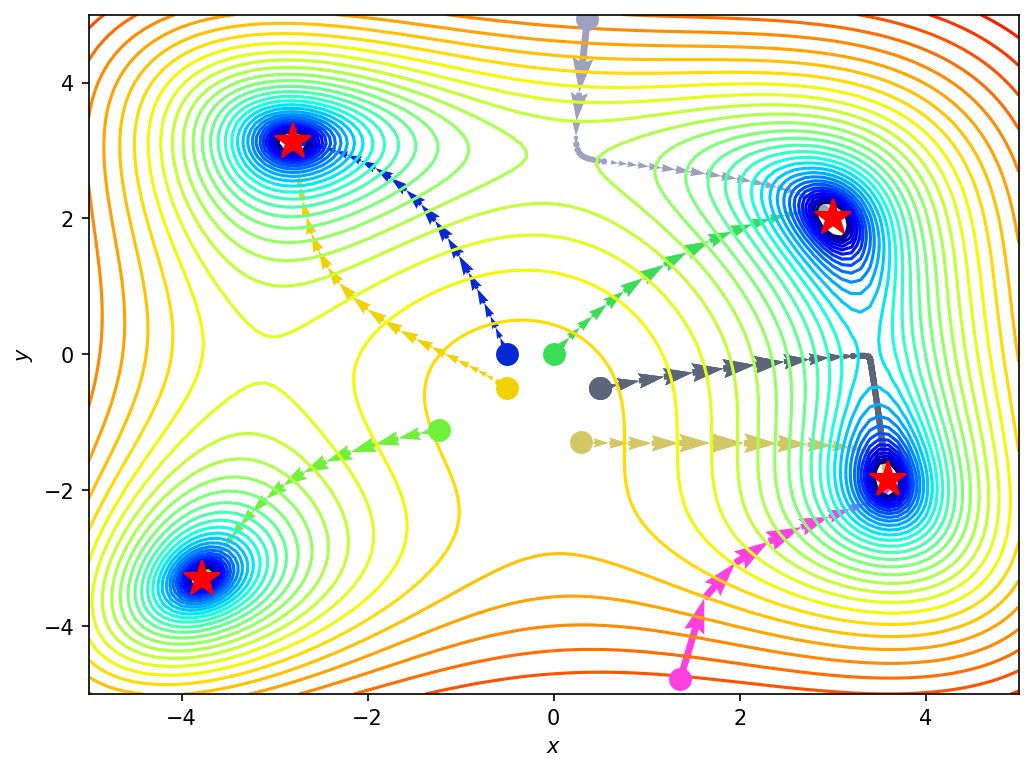

In [25]:
# visualize on a contour plot    

fig, ax = plt.subplots(dpi=150, figsize=(8, 6))
#
ax.contour(x, y, z, levels=np.logspace(0, 3.25, 35), norm=LogNorm(), cmap=plt.cm.jet)

for i,path in enumerate(paths):
    color = c=np.random.rand(3,)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],\
              scale_units='xy', angles='xy', scale=1, color=color)
    ax.plot(*begin_points[i], color=color ,marker='o', markersize=10)
    
ax.plot(*minima1_, 'r*', markersize=18)
ax.plot(*minima2_, 'r*', markersize=18)
ax.plot(*minima3_, 'r*', markersize=18)
ax.plot(*minima4_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Note how the starting point influences the path, and the local minimum attained.

### Animation

We generate matplotlib animations for multiple paths as follows.

In [14]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

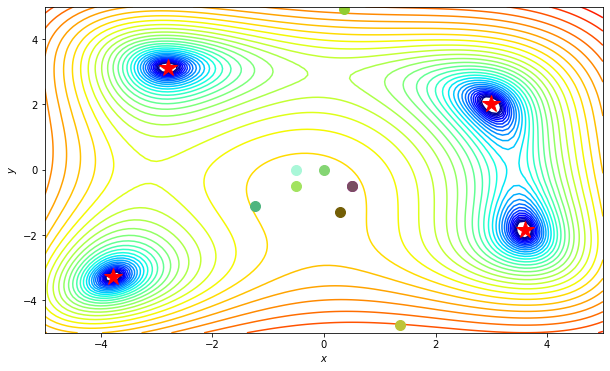

In [26]:
from itertools import zip_longest

fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(x, y, z, levels=np.logspace(0, 3.25, 35), norm=LogNorm(), cmap=plt.cm.jet)

for i,path in enumerate(paths):
    color = c=np.random.rand(3,)
    ax.plot(*begin_points[i].reshape(-1,1), color=color ,marker='o', markersize=10)

ax.plot(*minima1_, 'r*', markersize=18)
ax.plot(*minima2_, 'r*', markersize=18)
ax.plot(*minima3_, 'r*', markersize=18)
ax.plot(*minima4_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, ax=ax)

# ax.legend(loc='upper left')

In [27]:
HTML(anim.to_html5_video())